<a href="https://colab.research.google.com/github/Edwin1719/Machine-Learning-RRHH/blob/main/Machine_Learning_RRHH_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE MACHINE LEARNING RRHH**
**(Analisis Tasa de Abandono del Recurso Humano)**

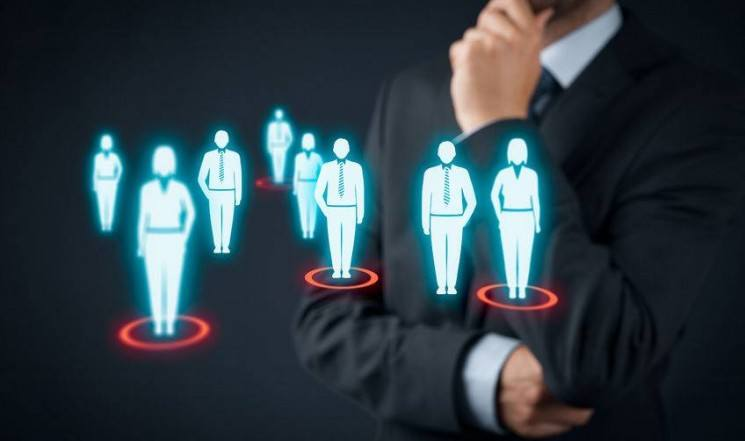



In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PREPARACION DEL ENTORNO DE TRABAJO

### CARGA DE LIBRERIAS

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### CARGA DE LOS DATOS

A continuacion realizaremos lo siguiente:

* Subir al Colab mediante el Google Drive de la Plataforma

* Ejecucion de la Funcion de lectura en pandas para el CSV AbandonoEmpleados.csv

In [90]:
df = pd.read_csv('/content/drive/MyDrive/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [91]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## ANALISIS EXPLORATORIO DE LOS DATOS

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

#### ANÁLISIS DE NULOS

In [93]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Observaciones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [94]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


#### EDA VARIABLES CATEGÓRICAS

In [95]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

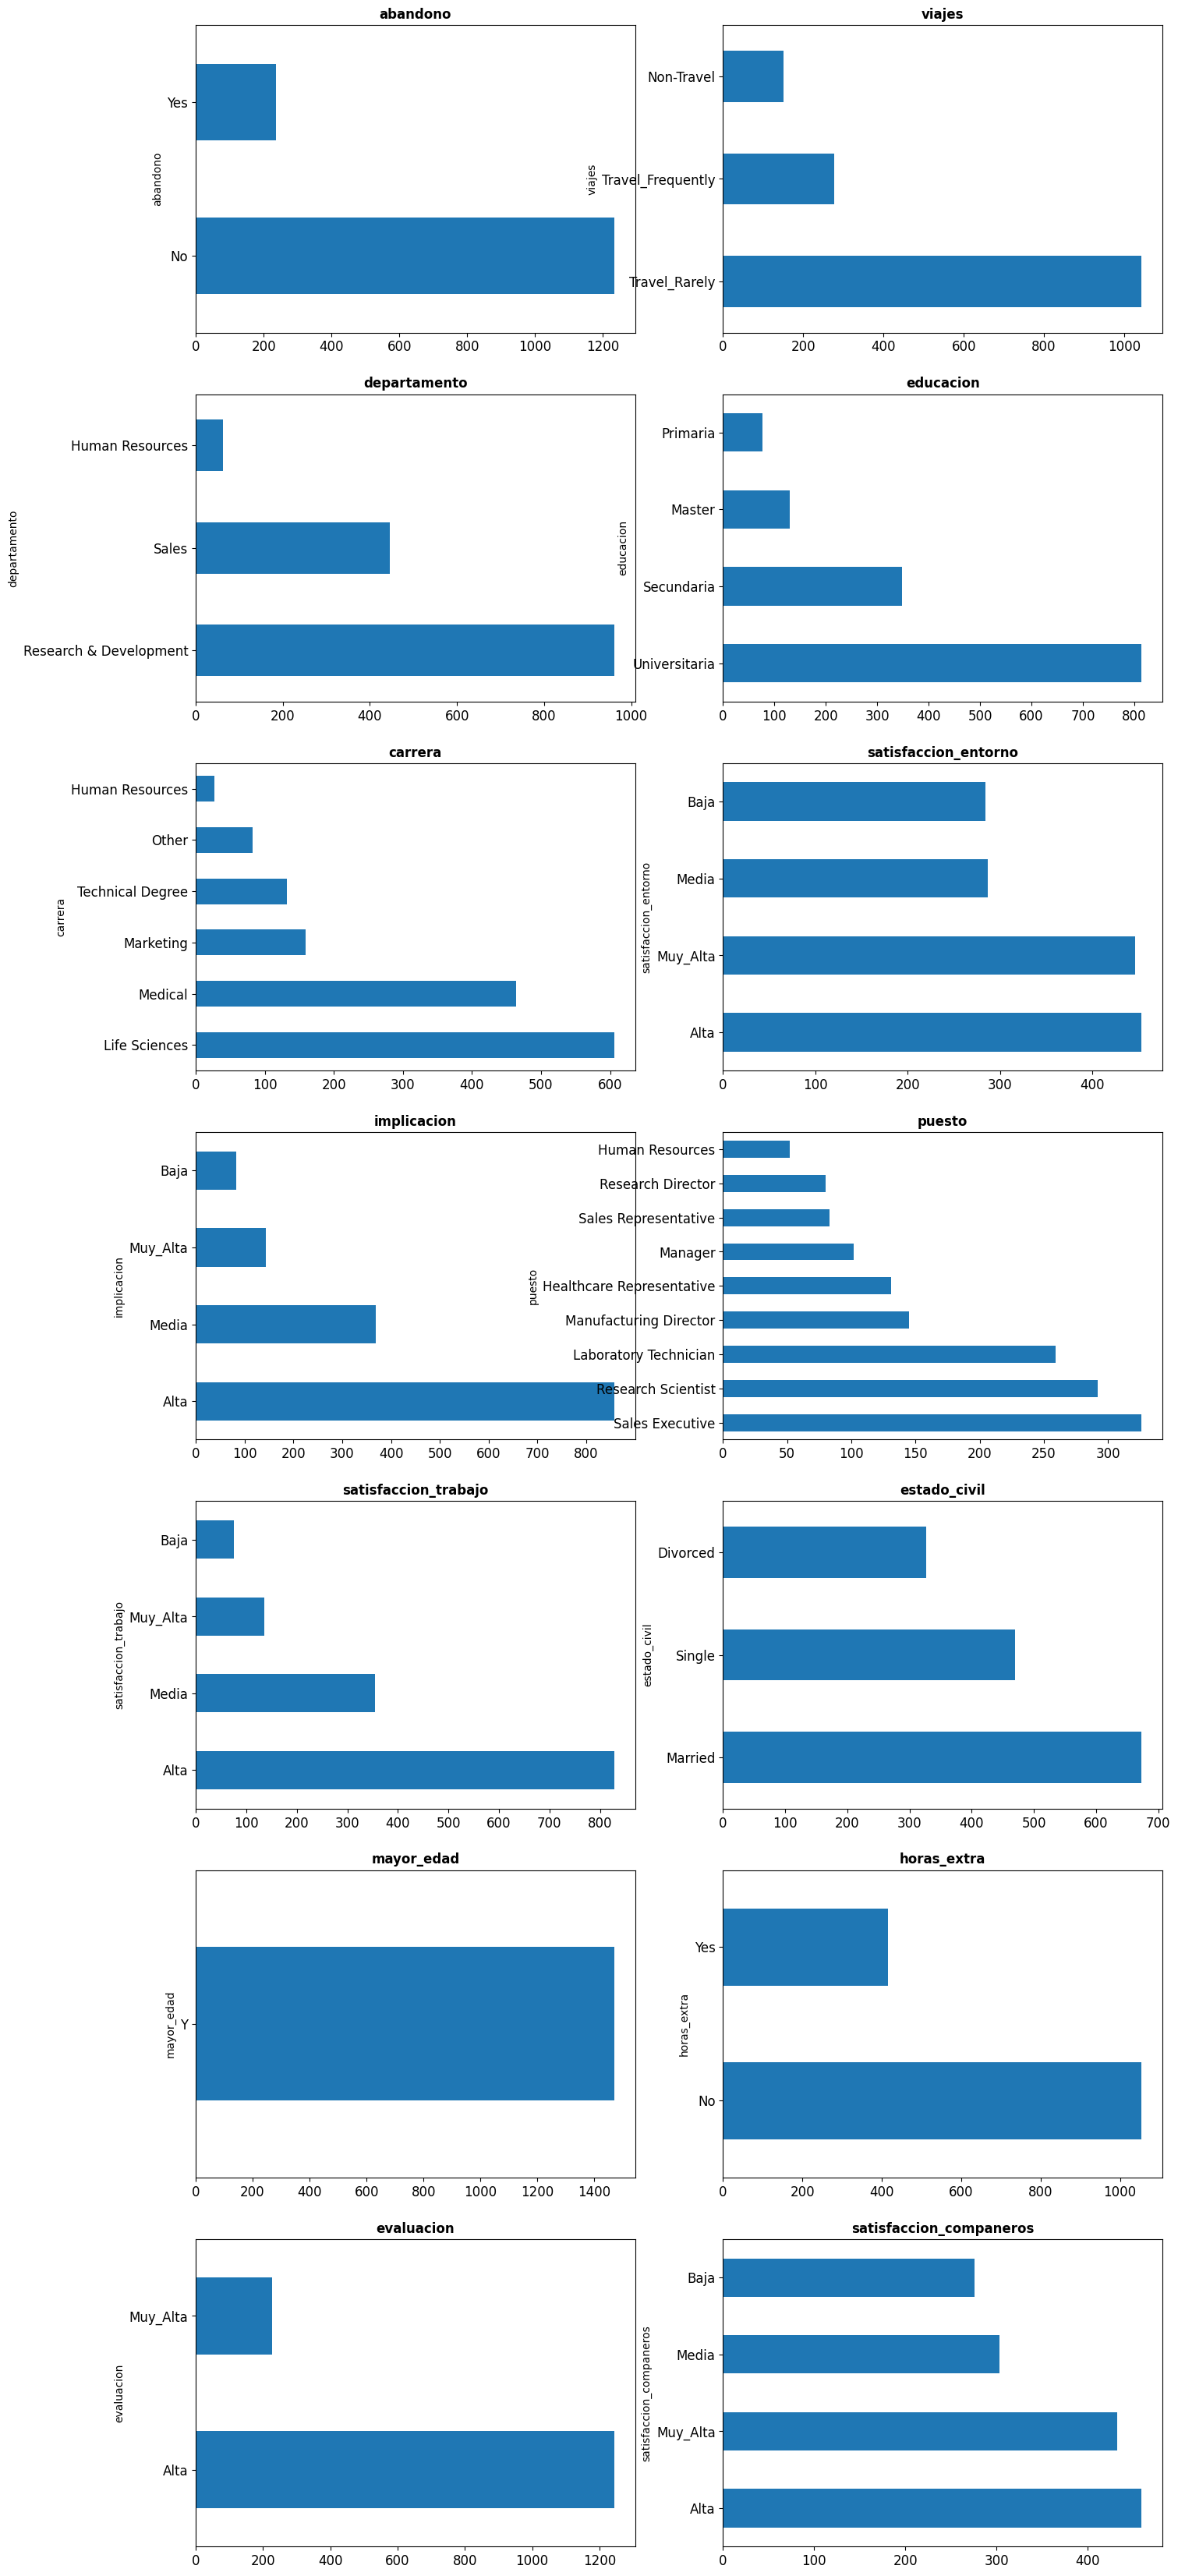

In [96]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [97]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [98]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [99]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [100]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [101]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [102]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

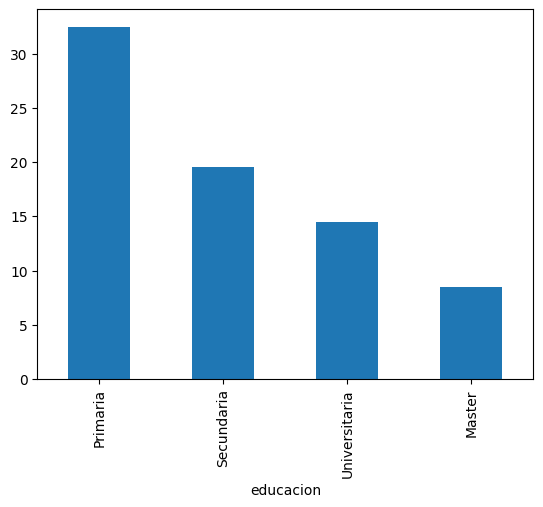

In [103]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

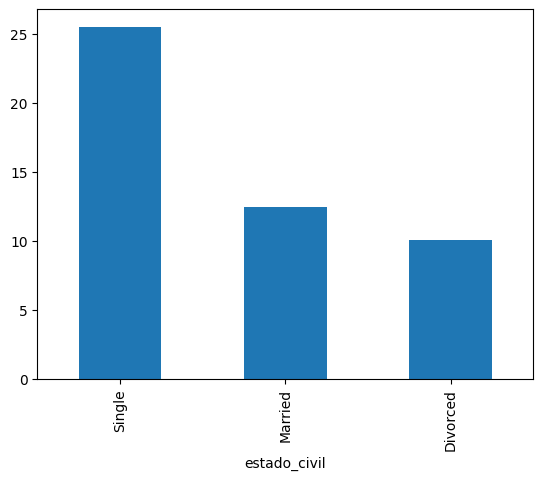

In [104]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

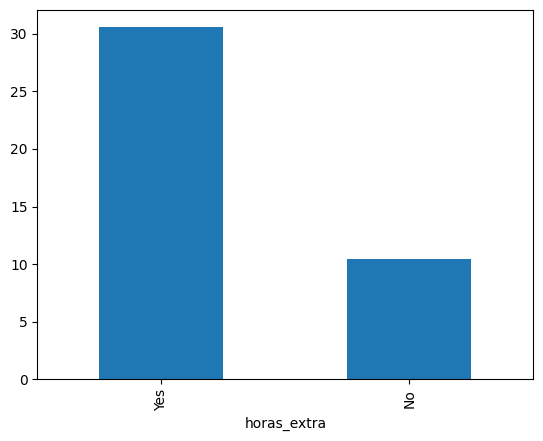

In [105]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

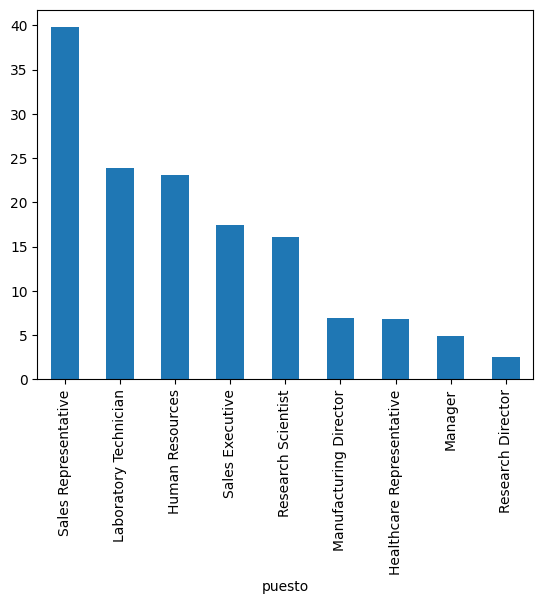

In [106]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

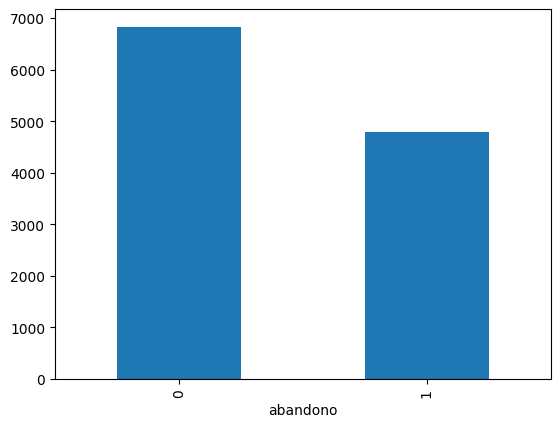

In [107]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [108]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [109]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [110]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [111]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [112]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [113]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [114]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [115]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

## MODELO DE MACHINE LEARNING

In [116]:
df_ml = df.copy()

In [117]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [118]:
# Mapeo de columnas Categoricas Ordinales incluye la variable educacion donde 'Primaria'=0, 'Secundaria'=1, 'Universitaria'=2 y 'Master'=3.

reemplazos1 = {'satisfaccion_entorno': {'Baja':0, 'Media':1, 'Alta':2, 'Muy_Alta':3},
               'implicacion': {'Baja':0, 'Media':1, 'Alta':2, 'Muy_Alta':3},
               'satisfaccion_trabajo': {'Baja':0, 'Media':1, 'Alta':2, 'Muy_Alta':3},
               'satisfaccion_companeros': {'Baja':0, 'Media':1, 'Alta':2, 'Muy_Alta':3},
               'horas_extra': {'No':0, 'Yes':1}}

for columna, mapeo in reemplazos1.items():
  df_ml[columna] = df_ml[columna].map(mapeo)
df_ml

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,2,2,...,Alta,0,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,2,1,2,...,Muy_Alta,3,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,3,1,1,...,Alta,1,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,3,2,1,...,Alta,2,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,0,2,1,...,Alta,3,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,2,3,2,...,Alta,2,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,3,1,3,...,Alta,0,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,3,2,...,Muy_Alta,1,1,6,0,6,0,3,73704,15035.616


In [119]:
reemplazos2 = {'educacion': {'Primaria':0, 'Secundaria':1, 'Universitaria':2, 'Master':3},
               'estado_civil': {'Single':0, 'Married':1, 'Divorced':2,}}

for columna, mapeo in reemplazos2.items():
  df_ml[columna] = df_ml[columna].map(mapeo)
df_ml

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,2,...,Alta,0,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,1,2,...,Muy_Alta,3,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,1,Other,3,1,1,...,Alta,1,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,2,Life Sciences,3,2,1,...,Alta,2,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,2,Medical,0,2,1,...,Alta,3,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,3,Medical,2,3,2,...,Alta,2,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,1,Medical,3,1,3,...,Alta,0,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,1,3,2,...,Muy_Alta,1,1,6,0,6,0,3,73704,15035.616


In [120]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   int64  
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   int64  
 8   implicacion               1470 non-null   int64  
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   int64  
 12  estado_civil              1470 non-null   int64  
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [121]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler

def Preprocesar_df(df_ml):
    # Variables categóricas
    cat = df_ml.select_dtypes('object').columns
    # Variables numéricas
    num = df_ml.select_dtypes('number').columns

    # Aplicamos OneHotEncoder
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    cat_ohe = ohe.fit_transform(df_ml[cat])
    df_cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(cat), index=df_ml.index)
    df_ml.drop(cat, axis=1, inplace=True)
    df_ml = pd.concat([df_ml, df_cat_ohe], axis=1)

    # Verificar valores nulos después de OneHotEncoder
    if df_ml.isnull().sum().sum() > 0:
        print("Valores nulos encontrados después de OneHotEncoder")
        print(df_ml.isnull().sum())

    # Estandarizamos las variables numéricas
    scaler = RobustScaler()
    df_ml[num] = scaler.fit_transform(df_ml[num])

    # Verificar valores nulos después de RobustScaler
    if df_ml.isnull().sum().sum() > 0:
        print("Valores nulos encontrados después de RobustScaler")
        print(df_ml.isnull().sum())

    # Escalamos las variables numéricas con MinMaxScaler
    minmax_scaler = MinMaxScaler()
    df_ml[num] = minmax_scaler.fit_transform(df_ml[num])

    # Verificar valores nulos después de MinMaxScaler
    if df_ml.isnull().sum().sum() > 0:
        print("Valores nulos encontrados después de MinMaxScaler")
        print(df_ml.isnull().sum())

    return df_ml

df_ml = Preprocesar_df(df_ml)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [122]:
# Ejecutando la funcion de Preprocesamiento para el dataframe df_ml

df_ml = Preprocesar_df(df_ml)
df_ml

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,edad,abandono,distancia_casa,educacion,satisfaccion_entorno,implicacion,nivel_laboral,satisfaccion_trabajo,estado_civil,salario_mes,...,puesto_Human Resources,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,evaluacion_Alta,evaluacion_Muy_Alta
id,,,,,,,,,,,,,,,,,,,,,
1,0.547619,1.0,0.000000,0.666667,0.333333,0.666667,0.25,0.666667,0.0,0.262454,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.738095,0.0,0.250000,0.333333,0.666667,0.333333,0.25,0.333333,0.5,0.217009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.452381,1.0,0.035714,0.333333,1.000000,0.333333,0.00,0.333333,0.0,0.056925,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.357143,0.0,0.071429,0.666667,1.000000,0.666667,0.00,0.666667,0.5,0.100053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.214286,0.0,0.035714,0.666667,0.000000,0.666667,0.00,0.666667,0.5,0.129489,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,0.428571,0.0,0.785714,1.000000,0.666667,1.000000,0.25,1.000000,0.5,0.082254,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2062,0.500000,0.0,0.178571,0.333333,1.000000,0.333333,0.50,0.333333,0.5,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2064,0.214286,0.0,0.107143,1.000000,0.333333,1.000000,0.25,1.000000,0.5,0.270300,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   edad                                 1470 non-null   float64
 1   abandono                             1470 non-null   float64
 2   distancia_casa                       1470 non-null   float64
 3   educacion                            1470 non-null   float64
 4   satisfaccion_entorno                 1470 non-null   float64
 5   implicacion                          1470 non-null   float64
 6   nivel_laboral                        1470 non-null   float64
 7   satisfaccion_trabajo                 1470 non-null   float64
 8   estado_civil                         1470 non-null   float64
 9   salario_mes                          1470 non-null   float64
 10  num_empresas_anteriores              1470 non-null   float64
 11  horas_extra                        

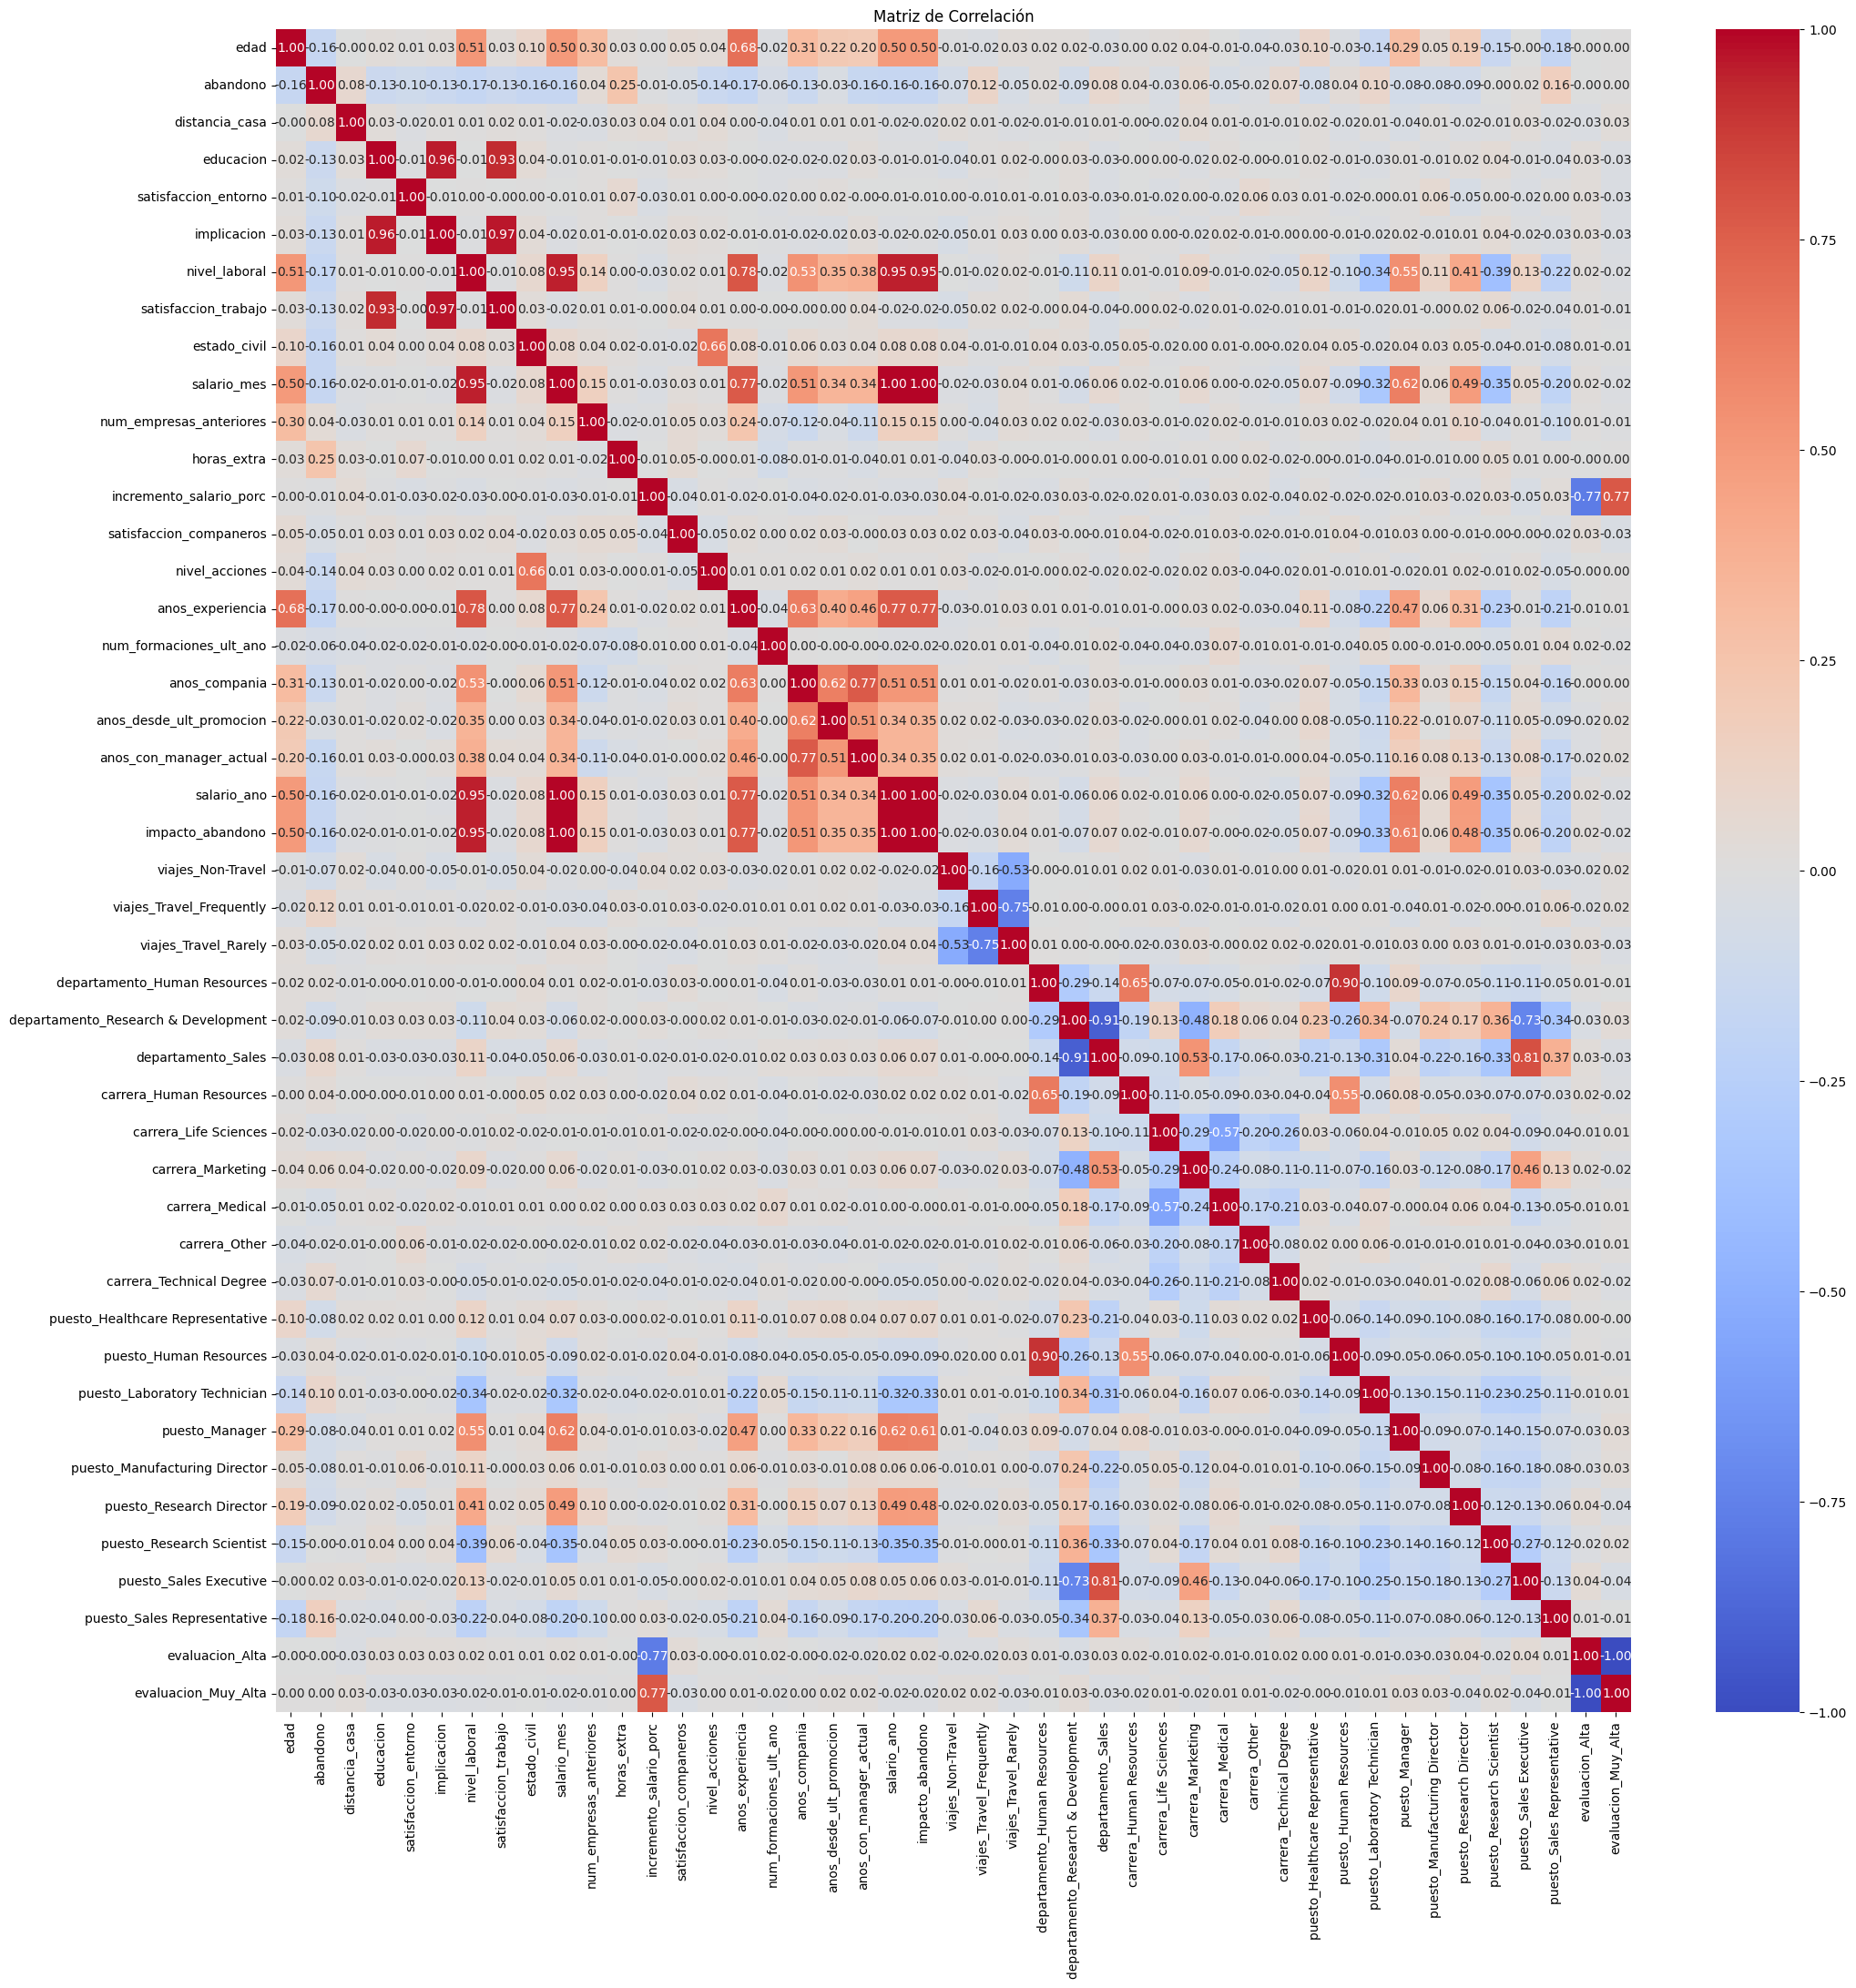

abandono                               1.000000
horas_extra                            0.246118
puesto_Sales Representative            0.157234
viajes_Travel_Frequently               0.115143
puesto_Laboratory Technician           0.098290
departamento_Sales                     0.080855
distancia_casa                         0.077924
carrera_Technical Degree               0.069355
carrera_Marketing                      0.055781
num_empresas_anteriores                0.043494
carrera_Human Resources                0.036466
puesto_Human Resources                 0.036215
puesto_Sales Executive                 0.019774
departamento_Human Resources           0.016832
evaluacion_Muy_Alta                    0.002889
puesto_Research Scientist             -0.000360
evaluacion_Alta                       -0.002889
incremento_salario_porc               -0.013478
carrera_Other                         -0.017898
carrera_Life Sciences                 -0.032703
anos_desde_ult_promocion              -0

In [124]:
import matplotlib.pyplot as plt
# Calcula la matriz de correlación
correlation_matrix = df_ml.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(24,24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Identifica las características más correlacionadas con 'abandono'
correlation_with_target = correlation_matrix['abandono'].sort_values(ascending=False)
print(correlation_with_target)

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency
# Inicializa una lista para almacenar los resultados
chi2_results = []

# Itera sobre todas las columnas excepto 'abandono'
for column in df_ml.columns:
  if column != 'abandono':
    # Crea una tabla de contingencia
    contingency_table = pd.crosstab(df_ml['abandono'], df_ml[column])

    # Realiza la prueba chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Almacena los resultados
    chi2_results.append({'feature': column, 'chi2': chi2, 'p-value': p})

# Crea un DataFrame a partir de los resultados
chi2_df = pd.DataFrame(chi2_results)

# Ordena el DataFrame por p-value
chi2_df = chi2_df.sort_values(by='p-value')

# Imprime los resultados
print(chi2_df)

                                feature         chi2       p-value
10                          horas_extra    87.564294  8.158424e-21
5                         nivel_laboral    72.529013  6.634685e-15
13                       nivel_acciones    60.598301  4.379390e-13
7                          estado_civil    46.163677  9.455511e-11
14                     anos_experiencia   122.302243  1.586242e-10
0                                  edad   119.174949  2.575853e-09
18              anos_con_manager_actual    74.617184  3.408337e-09
41          puesto_Sales Representative    34.513391  4.233289e-09
16                        anos_compania    95.388755  2.842980e-07
4                           implicacion    29.317968  1.920046e-06
6                  satisfaccion_trabajo    27.349345  4.973552e-06
2                             educacion    25.563969  1.176785e-05
22             viajes_Travel_Frequently    18.696599  1.532556e-05
3                  satisfaccion_entorno    22.503881  5.123469

In [126]:
# Filtra el DataFrame original para que contenga las características seleccionadas
selected_features = ['horas_extra', 'nivel_laboral', 'nivel_acciones',
                     'estado_civil', 'anos_experiencia', 'edad', 'carrera_Medical',
                     'anos_con_manager_actual', 'anos_compania', 'implicacion',
                     'salario_mes', 'satisfaccion_entorno', 'distancia_casa']

# Creando el Dataframe con las mejores caracteristicas
df_ml_MD = df_ml[selected_features + ['abandono']]

### DISEÑO DE LA MODELIZACIÓN

#### Separación variables predictoras y target

In [127]:
# Separacion e instanciamiento de variables predictoras y target
from sklearn.model_selection import train_test_split
x = df_ml_MD.drop(columns='abandono')
y = df_ml_MD['abandono']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

### Instanciamiento del Modelo de Clasificacion Random Forest

In [128]:
# Importacion de librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Separacion e instanciamiento de variables predictoras y target
x = df_ml_MD.drop(columns='abandono')
y = df_ml_MD['abandono']

# Aplica SMOTE para corregir el desbalanceo de clases
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

# Definir el modelo
model = RandomForestClassifier()

# Definir los hiperparámetros a buscar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Definir el KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir el RandomizedSearchCV
random_search = RandomizedSearchCV(model,param_distributions=param_dist,n_iter=10,cv=kf,scoring='accuracy',random_state=42)

# Ajustar el modelo
random_search.fit(train_x, train_y)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Predecir las probabilidades en el conjunto de prueba
y_proba = best_model.predict_proba(test_x)[:, 1]  # Probabilidad de la clase 1 (abandono)

### DEFINICION DE HIPERPARAMETROS Y ENTRENAMIENTO DEL MODELO

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [129]:
# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba original
print('Accuracy:', accuracy_score(test_y, best_model.predict(test_x)))
print('Precision:', precision_score(test_y, best_model.predict(test_x)))
print('Recall:', recall_score(test_y, best_model.predict(test_x)))
print('F1-score:', f1_score(test_y, best_model.predict(test_x)))

Accuracy: 0.9027027027027027
Precision: 0.9187675070028011
Recall: 0.8840970350404312
F1-score: 0.9010989010989011


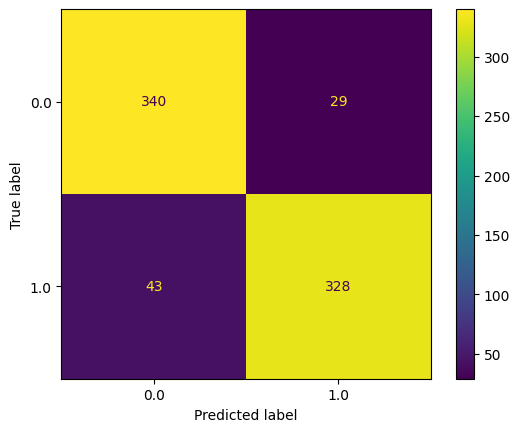

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcula la matriz de confusión
cm = confusion_matrix(test_y, best_model.predict(test_x))

# Crea una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Muestra la matriz de confusión
disp.plot()
plt.show()


#### Importancia de las variables

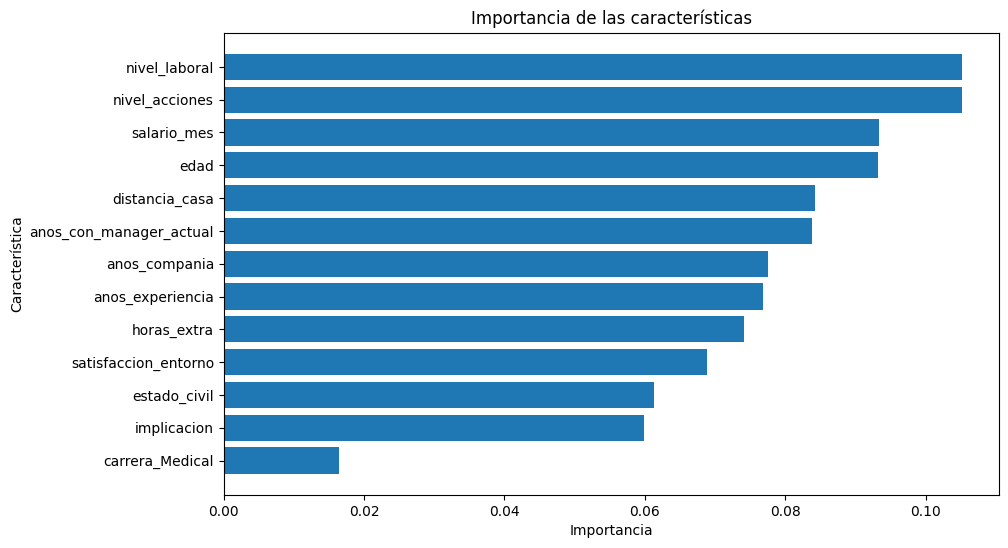

In [134]:
# Obtener la importancia de las características del mejor modelo
importances = best_model.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'feature': train_x.columns, 'importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Graficar las mejores características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las características más importantes en la parte superior
plt.show()


# EXPLOTACIÓN DE RESULTADOS

Incoporación del scoring al dataframe principal

In [135]:
# Predecir utilizando el modelo entrenado
# df_ml['scoring_abandono'] = best_model.predict(df_ml[selected_features])
df_ml['scoring_abandono'] = best_model.predict_proba(df_ml[x.columns])[:, 1]

# Eliminar la columna 'abandono'
df_ml = df_ml.drop(columns='abandono')

# Mostrar las primeras filas del DataFrame actualizado
df_ml.head()

,edad,distancia_casa,educacion,satisfaccion_entorno,implicacion,nivel_laboral,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,...,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,evaluacion_Alta,evaluacion_Muy_Alta,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,0.547619,0.000000,0.666667,0.333333,0.666667,0.25,0.666667,0.0,0.262454,0.888889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.80
2,0.738095,0.250000,0.333333,0.666667,0.333333,0.25,0.333333,0.5,0.217009,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.08
4,0.452381,0.035714,0.333333,1.000000,0.333333,0.00,0.333333,0.0,0.056925,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.92
5,0.357143,0.071429,0.666667,1.000000,0.666667,0.00,0.666667,0.5,0.100053,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.10
7,0.214286,0.035714,0.666667,0.000000,0.666667,0.00,0.666667,0.5,0.129489,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [136]:
# Ordenar el DataFrame por 'scoring_abandono' y mostrar las primeras 10 filas
df_ml_sorted = df_ml.sort_values(by='scoring_abandono', ascending=False)
df_ml_sorted.head(5)

,edad,distancia_casa,educacion,satisfaccion_entorno,implicacion,nivel_laboral,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,...,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,evaluacion_Alta,evaluacion_Muy_Alta,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1433,0.309524,0.250000,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.013270,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
959,0.023810,0.714286,0.333333,1.0,0.333333,0.0,0.333333,0.0,0.058557,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1844,0.261905,0.428571,0.333333,0.0,0.333333,0.0,0.333333,1.0,0.069826,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1004,0.285714,0.750000,0.666667,0.0,0.666667,0.0,0.666667,0.5,0.059136,0.444444,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1649,0.523810,0.214286,0.666667,0.0,0.666667,0.0,0.666667,0.0,0.060927,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

In [137]:
# Crear una nueva columna 'puesto' a partir de las columnas binarias
df_ml['puesto'] = np.select([df_ml['puesto_Laboratory Technician'] == 1,df_ml['puesto_Research Director'] == 1,
df_ml['puesto_Manager'] == 1,df_ml['puesto_Sales Representative'] == 1,df_ml['puesto_Research Scientist'] == 1,
df_ml['puesto_Sales Executive'] == 1],['Laboratory Technician','Research Director','Manager','Sales Representative',
'Research Scientist','Sales Executive'],default='Other')

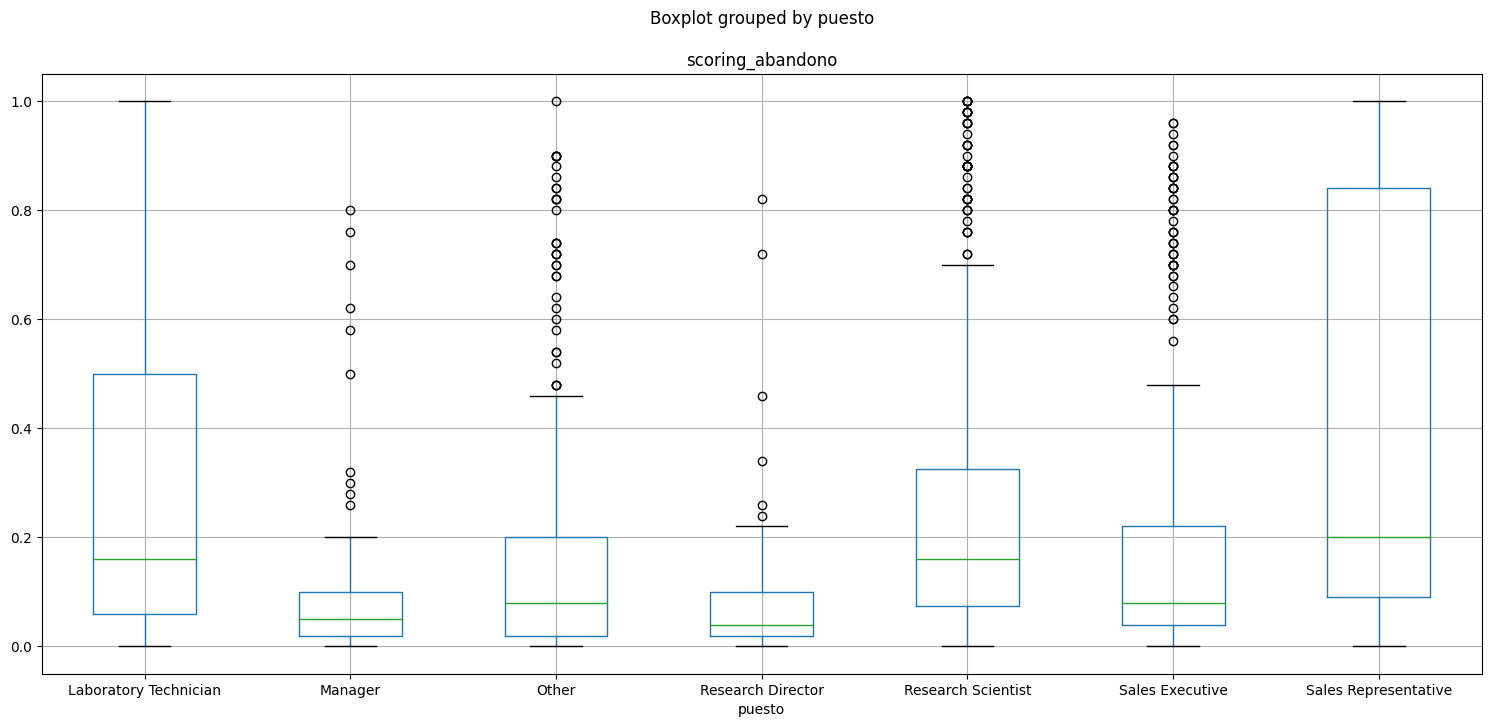

In [138]:
df_ml.boxplot(column='scoring_abandono', by=('puesto'),figsize = (18,8));

### GUARDAR EL RESULTADO FINAL

In [139]:
from google.colab import files
df_ml.to_excel('abandono_con_score.xlsx')
files.download('abandono_con_score.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>